In [56]:

def get_data(dataset, size=0):
    chatgpt_df      = pd.read_csv("lakeData/train/chatdata.csv")
    linkedin_df     = pd.read_csv("lakeData/train/linkedindata.csv")
    blackboard_df   = pd.read_csv("lakeData/train/blackboardData.csv")
    
#     chatgpt_df      = csv_dir_to_df("Data/" + dataset + "/ChatGPT")
#     linkedin_df     = csv_dir_to_df("Data/" + dataset + "/LinkedIn")
#     blackboard_df   = csv_dir_to_df("Data/" + dataset + "/Blackboard")
    
    sampleSize = min(len(chatgpt_df), len(blackboard_df), len(linkedin_df))
    
    chatgpt_df      = resample(chatgpt_df, replace=False, n_samples=sampleSize, random_state=RAND_ST)
    linkedin_df     = resample(linkedin_df, replace=False, n_samples=sampleSize, random_state=RAND_ST)
    blackboard_df   = resample(blackboard_df, replace=False, n_samples=sampleSize, random_state=RAND_ST)

    chatgpt_df["Website"] = "ChatGPT"
    linkedin_df["Website"] = "LinkedIn"
    blackboard_df["Website"] = "Blackboard"

    combined = pd.concat([chatgpt_df, linkedin_df, blackboard_df])

    return clean_data(combined, size)

In [57]:
train_data = get_data("Train", 5000)

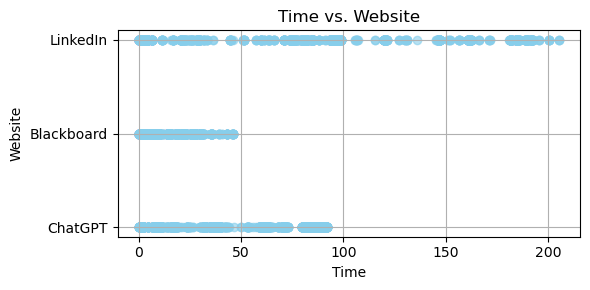

In [58]:
plt.figure(figsize=(6, 3))  # Adjust the figure size as needed
plt.scatter(train_data["Time"], train_data["Website"], color='skyblue', alpha=0.6)  # Adjust color and transparency
plt.title('Time vs. Website')
plt.xlabel('Time')
plt.ylabel('Website')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

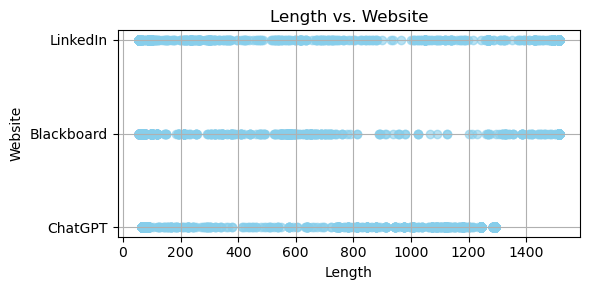

In [59]:
plt.figure(figsize=(6, 3))  # Adjust the figure size as needed
plt.scatter(train_data["Length"], train_data["Website"], color='skyblue', alpha=0.6)  # Adjust color and transparency
plt.title('Length vs. Website')
plt.xlabel('Length')
plt.ylabel('Website')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

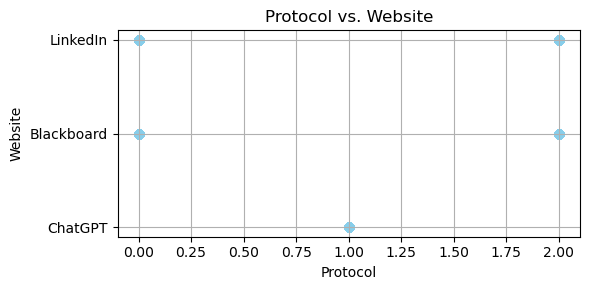

In [60]:
plt.figure(figsize=(6, 3))  # Adjust the figure size as needed
plt.scatter(train_data["Protocol"], train_data["Website"], color='skyblue', alpha=0.6)  # Adjust color and transparency
plt.title('Protocol vs. Website')
plt.xlabel('Protocol')
plt.ylabel('Website')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
{'param_activation': 'logistic', 'param_solver': 'lbfgs', 'param_alpha': 0.1, 'param_hidden_layer_sizes': 60, 'mean_test_score': 0.9422987321905882, 'std_test_score': 0.0010513230393205295, 'rank_test_score': 1}
score on test data:  0.8521241830065359
Accuracy = 0.85
Predicted   ChatGPT  Blackboard  LinkedIn
Actual
ChatGPT         723          93         0
Blackboard      269         547         0
LinkedIn          0           0       816

In [20]:
import pandas as pd
from sklearn.utils import resample

import os

from KNN import *
from NN import *


RAND_ST = 42 # to produce replicable results
KNN_TRAIN_SIZE = 7000


def clean_data(df, size):
    # make packet column numeric
    protocol_map = {}
    protocols = df["Protocol"].value_counts().index
    
    for protocol in protocols:
        if protocol not in protocol_map.keys():
            protocol_map[protocol] = len(protocol_map)

    df["Protocol"] = df["Protocol"].map(protocol_map)

    # subset to desired rows
    df = df[["Time", "Protocol", "Length", "Website"]]

    if size < 1 or size > len(df):
        # invalid size or no size passed in, don't down-sample data
        size = len(df)

    # potentially down-sample, and mix it up
    return resample(df, replace=False, n_samples=size, random_state=RAND_ST)


def csv_dir_to_df(dir_path):
    dfs = []

    for path in os.listdir(dir_path):
        dfs.append(pd.read_csv(dir_path + "/" + path))

    return pd.concat(dfs)


def get_data(dataset, size=0):
    chatgpt_df      = csv_dir_to_df("Data/" + dataset + "/ChatGPT")
    linkedin_df     = csv_dir_to_df("Data/" + dataset + "/LinkedIn")
    blackboard_df   = csv_dir_to_df("Data/" + dataset + "/Blackboard")
    
    chatgpt_df      = make_time_feature(chatgpt_df)
    linkedin_df     = make_time_feature(linkedin_df)
    blackboard_df   = make_time_feature(blackboard_df)
    
    sampleSize = min(len(chatgpt_df), len(blackboard_df), len(linkedin_df))
    
    chatgpt_df      = resample(chatgpt_df, replace=False, n_samples=sampleSize, random_state=RAND_ST)
    linkedin_df     = resample(linkedin_df, replace=False, n_samples=sampleSize, random_state=RAND_ST)
    blackboard_df   = resample(blackboard_df, replace=False, n_samples=sampleSize, random_state=RAND_ST)

    chatgpt_df["Website"] = "ChatGPT"
    linkedin_df["Website"] = "LinkedIn"
    blackboard_df["Website"] = "Blackboard"

    combined = pd.concat([chatgpt_df, linkedin_df, blackboard_df])

    return clean_data(combined, size)


def main():
    # Use the same test data for all models
    test_data = get_data("Test")

#     knn_train_data = get_data("Train", KNN_TRAIN_SIZE)
#     run_KNN(knn_train_data, test_data)

    nn_train_data = get_data("Train")
    run_NN(nn_train_data, test_data)


In [21]:
def compare_classes(actual, predicted, names=None):
    '''Function returns a confusion matrix, and overall accuracy given:
            Input:  actual - a list of actual classifications
                    predicted - a list of predicted classifications
                    names (optional) - a list of class names
    '''
    accuracy = sum(actual==predicted)/actual.shape[0]
    
    classes = pd.DataFrame(columns = ['Actual', 'Predicted'])
    classes['Actual'] = actual
    classes['Predicted'] = predicted

    conf_mat = pd.crosstab(classes['Actual'], classes['Predicted'])
    
    if type(names) != type(None):
        conf_mat.index = names
        conf_mat.index.name = 'Actual'
        conf_mat.columns = names
        conf_mat.columns.name = 'Predicted'
    
    print('Accuracy = ' + format(accuracy, '.2f'))
    return conf_mat, accuracy


In [30]:
# NN.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from seaborn import heatmap

from utils import RAND_ST, compare_classes


def pre_process(train_data, test_data):

    X = train_data[["Time", "Protocol", "Length"]]
    y = train_data["Website"]

    X_test = test_data[["Time", "Protocol", "Length"]]
    y_test = test_data["Website"]

    # Scale the data
    scale = StandardScaler()

    # scales, and makes 2d arrays (3 cols)
    X = scale.fit_transform(X)
    X_test = scale.transform(X_test)

    # make y into 1d arrays (1 col)
    y = y.to_numpy()
    y_test = y_test.to_numpy()

    return X, y, X_test, y_test 


def grid_search(X, y):
    mlp = MLPClassifier(random_state=RAND_ST, max_iter=1000)

    # real params for initial large gridsearch
#     parameters = {
#         'activation': ['identity', 'logistic', 'tanh', 'relu'],
#         'solver': ['adam','lbfgs','sgd'],
#         'alpha': 10.0 ** -np.arange(-1, 10),
#         'hidden_layer_sizes':[[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
#     }

    # test params for debug
    parameters = {
        'activation': ['tanh'],
        'solver': ['adam'],
        'alpha': [0.01],
        'hidden_layer_sizes':[(3),(4),(5),(6),(7),(8),(9),(10),(11),(12)]
    }

    gs = GridSearchCV(mlp, parameters, n_jobs=-1, scoring="accuracy", verbose=3)
    gs.fit(X, y)

    # Store and print data for analysis
    print(gs.score(X, y))
    print(gs.best_params_)
    results = pd.DataFrame(gs.cv_results_)
    results = results[['param_activation','param_solver',
                       'param_alpha','param_hidden_layer_sizes',
                       'mean_test_score','std_test_score','rank_test_score']]
    results.to_csv("Output/nn_gridsearch.csv")
    best_params = results[results['rank_test_score'] == 1]
    params_dict = best_params.to_dict(orient='records')[0]
    print(params_dict)

    return gs


def predict_and_show(gs, X_test, y_test):
    test_pred = gs.predict(X_test)
    test_score = accuracy_score(test_pred, y_test)
    print("score on test data: ",test_score)

    y_names = ["?","?","?"]
    confusion_matrix, accuracy = compare_classes(y_test, test_pred, y_names)
    print(confusion_matrix)

    heatmap(confusion_matrix, cmap='Purples',
            vmin=0, vmax=800,
            annot=True, fmt='.2f',
            xticklabels=y_names, yticklabels=y_names)
    plt.show()


def run_NN(train_data, test_data):
    print("Starting Neural Network")

    X, y, X_test, y_test = pre_process(train_data, test_data)
    gs = grid_search(X, y)
    predict_and_show(gs, X_test, y_test)


Starting Neural Network
Fitting 5 folds for each of 2 candidates, totalling 10 fits
0.7784644056990118
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': 4, 'solver': 'adam'}
{'param_activation': 'tanh', 'param_solver': 'adam', 'param_alpha': 0.01, 'param_hidden_layer_sizes': 4, 'mean_test_score': 0.7699553405105651, 'std_test_score': 0.012139776272791046, 'rank_test_score': 1}
score on test data:  0.7177287581699346
Accuracy = 0.72
Predicted    ?    ?    ?
Actual                  
?          612  204    0
?          487  329    0
?            0    0  816


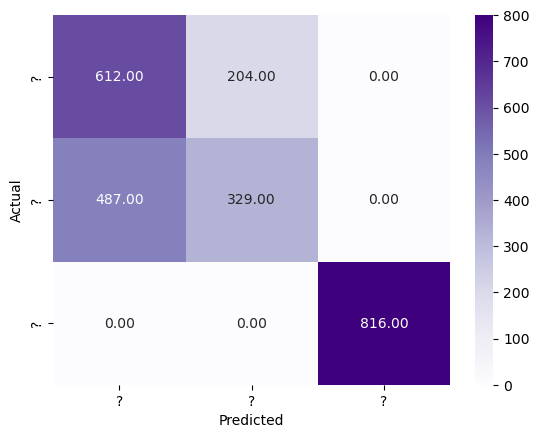

[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=[1], solver=adam;, score=0.658 total time=   3.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(1,), solver=adam;, score=0.659 total time=   3.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(2,), solver=adam;, score=0.657 total time=   7.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=2, solver=adam;, score=0.657 total time=   6.9s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=3, solver=adam;, score=0.742 total time=   6.6s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=[1], solver=adam;, score=0.652 total time=   2.7s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(0,), solver=adam;, score=nan total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(2,), solver=adam;, score=0.720 total time=  11.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=3, solver=adam;, score=0.742 total time=   5.8s
[CV 1

In [31]:
main()

In [ ]:
# OLD (as of may 3, 6am)

In [384]:
train_data = get_data("Train")
test_data = get_data("Test")


In [385]:
X = train_data[["Time", "Protocol", "Length"]]
y = train_data["Website"]

X_test = test_data[["Time", "Protocol", "Length"]]
y_test = test_data["Website"]

In [386]:
X.head()

,Time,Protocol,Length
3257,135.972273,1,908
4650,282.143790,1,1166
1356,28.390719,0,66
3533,239.656620,2,96
791,9.054848,0,56


In [387]:
y.head()

3257      LinkedIn
4650      LinkedIn
1356    Blackboard
3533       ChatGPT
791        ChatGPT
Name: Website, dtype: object

In [388]:
X_test.head()

,Time,Protocol,Length
1213,11.486932,0,66
520,11.012850,1,1292
115,2.309617,1,1292
57,1.398539,1,1242
226,1.412423,0,1514


In [389]:
y_test.head()


1213    Blackboard
520       LinkedIn
115       LinkedIn
57        LinkedIn
226     Blackboard
Name: Website, dtype: object

In [390]:
# Scale the data
scale = StandardScaler()

# 2d arrays (3 cols)
X = scale.fit_transform(X)
X_test = scale.transform(X_test)

# make y into 1d arrays (1 col)
y = y.to_numpy()
y_test = y_test.to_numpy()

print(type(X))
print(type(X_test))
print(type(y))
print(type(y_test))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [391]:
# real grid search
parameters = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['adam','lbfgs','sgd'], 
              'alpha': 10.0 ** -np.arange(-1, 10), 
              'hidden_layer_sizes':[[i for i in range(4,10)] for j in range(4,10)]
             }


In [37]:
# just for testing
parameters = {
    'activation': ['relu'],
              'solver': ['adam','lbfgs'], 
                                  'alpha':[0.0001],
                    'hidden_layer_sizes':(9,),
}

In [38]:
mlp = MLPClassifier(random_state=42, max_iter=1000)
gridsearch = GridSearchCV(mlp, parameters, n_jobs=-1, scoring="accuracy", verbose=2)
# n_jobs = -1 means use all availible cores

In [39]:
gridsearch.fit(X, y)


NameError: name 'X' is not defined

In [409]:
# test data with built-in gridsearch thing???
test_pred = gridsearch.predict(X_test)
test_score = accuracy_score(test_pred, y_test)

print("score on test data: ",test_score)

# it does work the same!


score on test data:  0.8308823529411765


In [405]:
# despite gridsearch.predict, keep this so it writes to csv

print(gridsearch.score(X, y))
print(gridsearch.best_params_)
results = pd.DataFrame(gridsearch.cv_results_)
results = results[['param_activation','param_solver',
                   'param_alpha','param_hidden_layer_sizes',
                   'mean_test_score','std_test_score','rank_test_score']]
results.to_csv("nn_gridsearch.csv")
best_params = results[results['rank_test_score'] == 1]
params_dict = best_params.to_dict(orient='records')[0]
print(params_dict)
# print(results[results['mean_test_score'] == max(results['mean_test_score'])])
# print(results[results['std_test_score'] == min(results['std_test_score'])])


0.8943819122587606
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 9, 'solver': 'lbfgs'}
{'param_activation': 'relu', 'param_solver': 'lbfgs', 'param_alpha': 0.0001, 'param_hidden_layer_sizes': 9, 'mean_test_score': 0.9135031646615405, 'std_test_score': 0.005677429630084079, 'rank_test_score': 1}


In [406]:
# don't need this with gridsearch.predict()
# clf = MLPClassifier(
#     activation=params_dict['param_activation'],
#     solver=params_dict['param_solver'],
#     alpha=params_dict['param_alpha'],
#     hidden_layer_sizes=params_dict['param_hidden_layer_sizes'],
#     random_state=42,
#     max_iter=1000,
# )

In [410]:
# don't need this with gridsearch.predict()


# clf.fit(X, y)

[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, solver=adam;, score=0.866 total time=  14.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, solver=lbfgs; total time=   9.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, solver=lbfgs; total time=   8.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, solver=adam;, score=0.865 total time=  15.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, solver=lbfgs; total time=  10.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, solver=lbfgs;, score=0.877 total time=  10.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, solver=adam; total time=  13.7s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, solver=lbfgs;, score=0.896 total time=   9.5s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, solver=lbfgs;, score=0.917 total time=   7.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=9, s

KeyboardInterrupt: 

In [398]:
# don't need this with gridsearch.predict()


# # test data
# test_pred = clf.predict(X_test)
# test_score = accuracy_score(test_pred, y_test)

# print("score on test data: ",test_score)


score on test data:  0.8308823529411765


In [411]:
y_names = ["ChatGPT","Blackboard","LinkedIn"]
confusion_matrix, accuracy = compare_classes(y_test, test_pred, y_names)
print(confusion_matrix)

Accuracy = 0.83
Predicted   ChatGPT  Blackboard  LinkedIn
Actual                                   
ChatGPT         748          68         0
Blackboard      346         470         0
LinkedIn          0           0       816


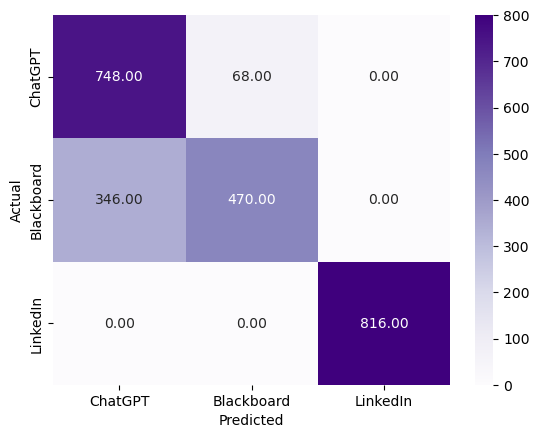

In [412]:
heatmap(confusion_matrix, cmap='Purples', vmin=0, vmax=800,
            annot=True, fmt='.2f', xticklabels=y_names, yticklabels=y_names)
plt.show()


In [ ]:

# old CM stuff

In [245]:
# CM for train data
cm = confusion_matrix(X, y)
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=cm)
cm_display.plot()
plt.show()

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [156]:
# CM for test data
cm = confusion_matrix(labels, test_pred)
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=cm)

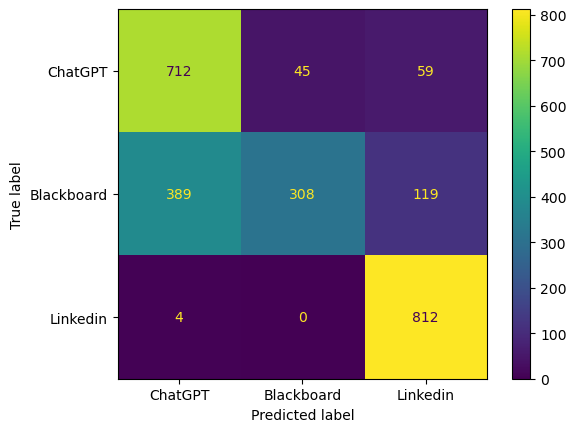

[CV 3/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=800, random_state=42, solver=adam;, score=0.519 total time=   1.3s
[CV 5/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=800, random_state=42, solver=adam;, score=0.373 total time=   1.2s
[CV 3/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=1000, random_state=42, solver=adam;, score=0.519 total time=   1.2s
[CV 5/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=1100, random_state=42, solver=adam;, score=0.373 total time=   1.2s
[CV 4/5] END alpha=0.1, hidden_layer_sizes=5, max_iter=800, random_state=42, solver=adam;, score=0.391 total time=   0.8s
[CV 5/5] END alpha=0.1, hidden_layer_sizes=5, max_iter=900, random_state=42, solver=adam;, score=0.417 total time=   0.9s
[CV 3/5] END alpha=0.1, hidden_layer_sizes=5, max_iter=1100, random_state=42, solver=adam;, score=0.429 total time=   1.0s
[CV 2/5] END alpha=0.1, hidden_layer_sizes=6, max_iter=800, random_state=42, solver=adam;, score=0.435 total time=   0.7s
[CV 2/5] END alpha=0.

[CV 1/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=700, random_state=42, solver=adam;, score=0.403 total time=   1.8s
[CV 1/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=1000, random_state=42, solver=adam;, score=0.403 total time=   1.7s
[CV 4/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=1100, random_state=42, solver=adam;, score=0.515 total time=   1.1s
[CV 5/5] END alpha=0.1, hidden_layer_sizes=5, max_iter=700, random_state=42, solver=adam;, score=0.417 total time=   0.9s
[CV 3/5] END alpha=0.1, hidden_layer_sizes=5, max_iter=900, random_state=42, solver=adam;, score=0.429 total time=   1.0s
[CV 1/5] END alpha=0.1, hidden_layer_sizes=5, max_iter=1100, random_state=42, solver=adam;, score=0.433 total time=   1.0s
[CV 4/5] END alpha=0.1, hidden_layer_sizes=6, max_iter=700, random_state=42, solver=adam;, score=0.464 total time=   1.5s
[CV 5/5] END alpha=0.1, hidden_layer_sizes=6, max_iter=900, random_state=42, solver=adam;, score=0.415 total time=   1.3s
[CV 4/5] END alpha=0.

[CV 3/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=700, random_state=42, solver=adam;, score=0.519 total time=   1.3s
[CV 2/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=900, random_state=42, solver=adam;, score=0.479 total time=   1.8s
[CV 3/5] END alpha=0.1, hidden_layer_sizes=4, max_iter=1100, random_state=42, solver=adam;, score=0.519 total time=   1.2s
[CV 4/5] END alpha=0.1, hidden_layer_sizes=5, max_iter=700, random_state=42, solver=adam;, score=0.391 total time=   0.8s
[CV 5/5] END alpha=0.1, hidden_layer_sizes=5, max_iter=800, random_state=42, solver=adam;, score=0.417 total time=   0.9s
[CV 2/5] END alpha=0.1, hidden_layer_sizes=5, max_iter=1000, random_state=42, solver=adam;, score=0.386 total time=   1.2s
[CV 2/5] END alpha=0.1, hidden_layer_sizes=6, max_iter=700, random_state=42, solver=adam;, score=0.435 total time=   0.8s
[CV 4/5] END alpha=0.1, hidden_layer_sizes=6, max_iter=800, random_state=42, solver=adam;, score=0.464 total time=   1.4s
[CV 5/5] END alpha=0.1

In [157]:
cm_display.plot()
plt.show()